In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [4]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [198]:
#pip install category_encoders
#pip install --upgrade scipy

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit, StratifiedKFold, RepeatedKFold

from sklearn.neighbors import KNeighborsRegressor

import sklearn

import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors

from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score

from sklearn import svm

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer , make_column_transformer, TransformedTargetRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.linear_model import ElasticNet, Ridge, LinearRegression, Lasso, Lars
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from scipy import stats

### Область работы 2 (поиск  модели .... )

In [457]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

#### Загрузили датасет

In [460]:
df = pd.read_csv(path_train)
display(df.head())
display(df.describe())
display(df.info())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03


,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.00000
mean,0.797227,61.746219,57.451551,3938.457274,5.728667,5.732720,3.53753
std,0.474440,1.420742,2.230915,3998.851904,1.123597,1.153284,0.70956
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.00000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.91000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.53000
75%,1.040000,62.500000,59.000000,5324.500000,6.540000,6.530000,4.03000
max,5.010000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.80000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


None

#### Исправили ошибочные данные

In [462]:
df['y']=np.where(df['y']>=15, df['y']/10,df['y'])
df['z']=np.where(df['z']>=15, df['z']/10,df['z'])

#### Очищаем от дубликатов

In [464]:
df.drop_duplicates(inplace=True)

#### Проверим на пропущенные значения

In [466]:
missing_values = df.isnull().sum()
print("Количество пропущенных значений по признакам:")
print(missing_values)

Количество пропущенных значений по признакам:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


##### Их нет

#### Посмотрим корреляционную матрицу признаков 

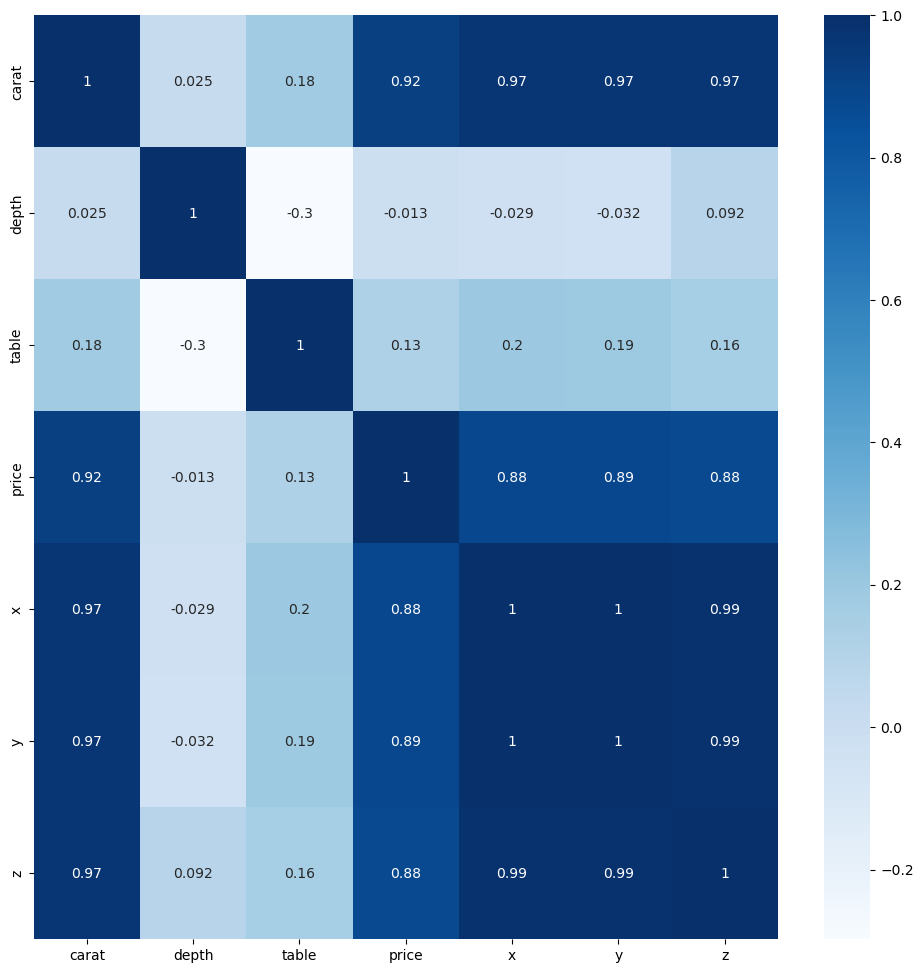

In [473]:
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(['color', 'clarity', 'cut'], axis=1).corr(),annot=True,cmap='Blues')
plt.show()

#### Построим графики распределения признаков

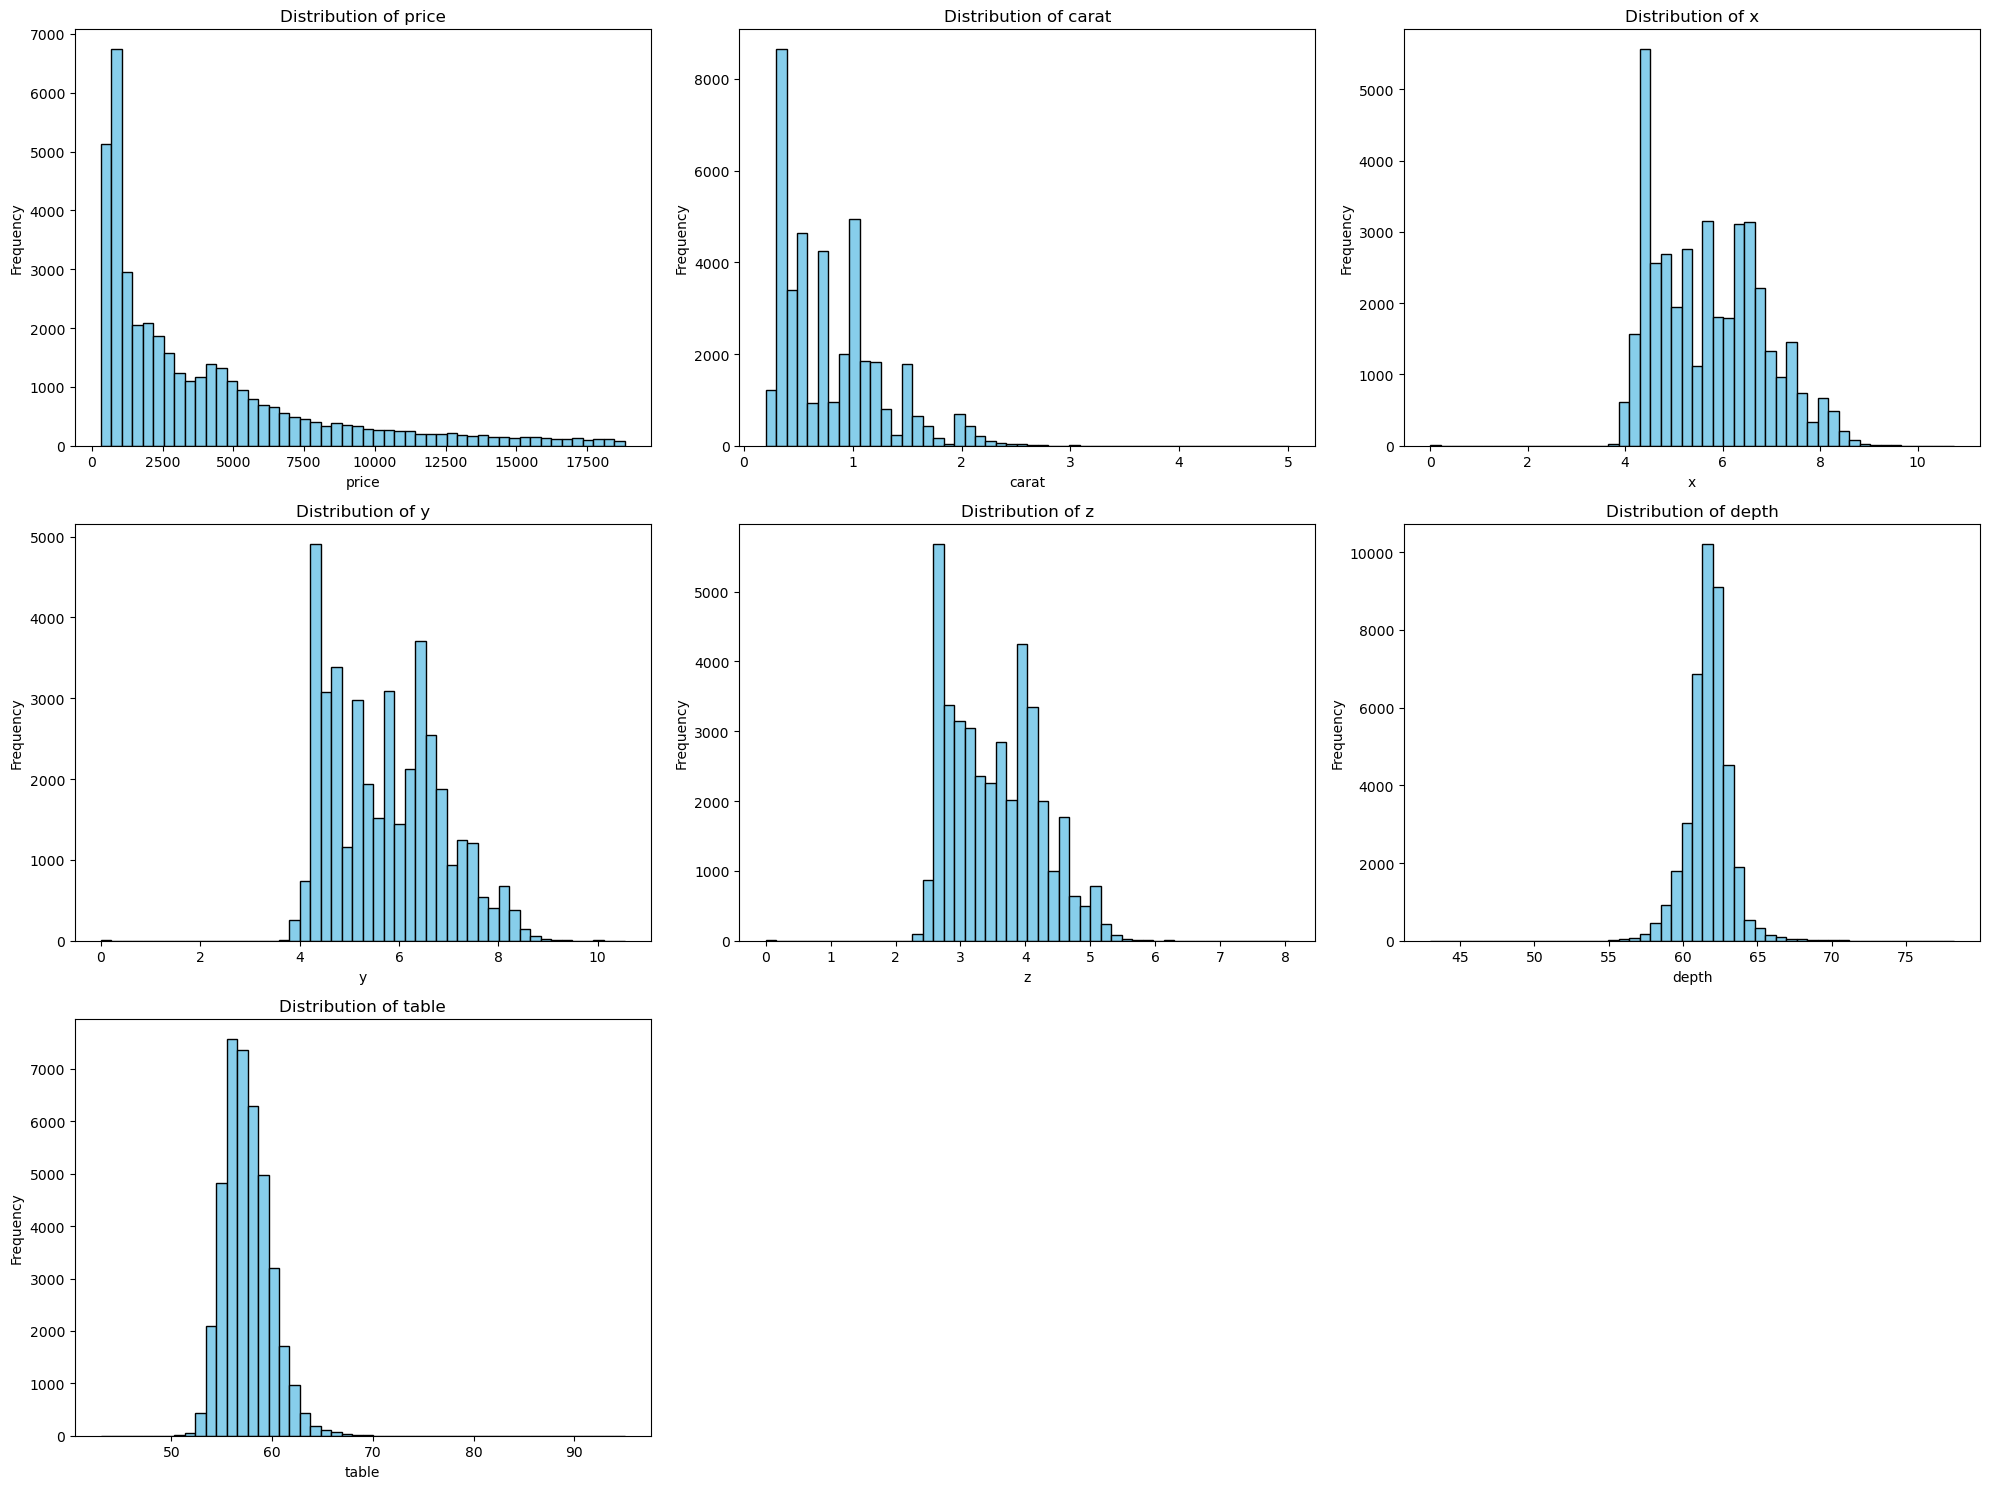

In [475]:
numeric_cols = ['price', 'carat', 'x', 'y', 'z', 'depth', 'table']
n_rows = (len(numeric_cols) - 1) // 3 + 1
n_cols = 3

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))

ax = ax.flatten()

for i, col in enumerate(numeric_cols):
    ax[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

for i in range(len(numeric_cols), len(ax)):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

#### Распределение цены имеет слишком большие хвосты, а значит большая вероятность появления выбросов 

#### Построим Boxplot для цены, чтобы определить наличие выбросов

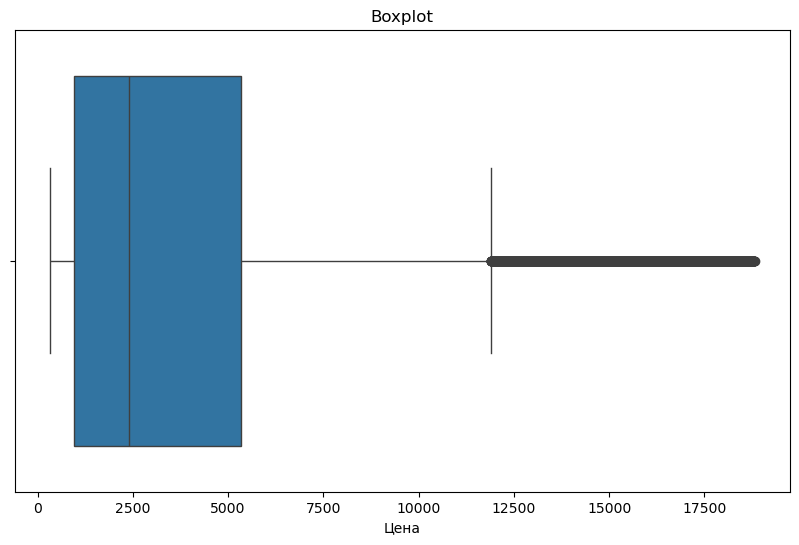

In [478]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot')
plt.xlabel('Цена')
plt.show()

#### Выбросы определенно присутствуют. Опробовав несколько способов борьбы с ними, принято решение, что эффективнее всего будет их просто удалить

In [480]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Количество строк после удаления выбросов:", df.shape[0])

Количество строк после удаления выбросов: 37696


#### Делим набор на тренировочный и тестовый

In [482]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30156 entries, 29987 to 25244
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    30156 non-null  float64
 1   cut      30156 non-null  object 
 2   color    30156 non-null  object 
 3   clarity  30156 non-null  object 
 4   depth    30156 non-null  float64
 5   table    30156 non-null  float64
 6   x        30156 non-null  float64
 7   y        30156 non-null  float64
 8   z        30156 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.3+ MB


#### Пропущенные значения все-таки есть, они закодированы в виде 0

In [485]:
ind_nan = X_train[X_train.eq(0).any(axis=1)].index
X_train[X_train.eq(0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z
36549,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0
33954,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0
7928,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0
4817,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0
13661,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0
35064,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0
18359,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0


### Column Transformer для наших переменных

In [487]:
axis_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=0, strategy='mean')),
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col':'clarity',
    'mapping':{'IF':7, 'VVS1':6, 'VVS2':5, 'VS1':4, 'VS2':3, 
               'SI1':2, 'SI2':1, 'I1':0}
    }]

clarity_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])

cut_map = [{
    'col':'cut',
    'mapping':{'Ideal':4, 'Premium':3, 'Very Good':2, 'Good':1, 'Fair':0}
    }]

cut_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', MinMaxScaler())
    ])

color_map = [{
    'col':'color',
    'mapping':{'I':6, 'E':5, 'D':4, 'H':3, 'F':2, 
               'G':1, 'J':0}
    }]

color_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', MinMaxScaler())
    ])

carat_transformer = Pipeline(steps=[
    ('polynom', PolynomialFeatures(3,include_bias=False)),
    ('scaler', StandardScaler())])

In [488]:
axis_features = ['x','y','z']
num_features = ['depth','table']

In [489]:
CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", StandardScaler(), num_features),
        ("cut_transformer", cut_transformer, ['cut']),
        ("clarity_transformer", clarity_transformer, ['clarity']),
        ("carat_transformer", carat_transformer, ['carat']),
        ("color_transformer", color_transformer, ['color'])
        ])

display(CT)

ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(missing_values=0)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['x', 'y', 'z']),
                                ('num', StandardScaler(), ['depth', 'table']),
                                ('cut_transformer',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'cut',
                                                                           'data_type': dtype('O'...
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity']),
                                ('carat_transformer',
                                 Pipeline(steps=[('polynom',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['carat']),
                                ('color_transformer',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'color',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': I    6
E    5
D    4
H    3
F    2
G    1
J    0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['color'])])

#### Собственная метрика irq_mse 

In [491]:
def irq_mse(y_true, y_predict):
    delta = y_predict-y_true
    Q25 = np.quantile(delta, 0.25)
    Q75 = np.quantile(delta, 0.75)
    irq = Q75-Q25
    mask = (delta<(Q25-1.5*irq)) | (delta> (Q75+1.5*irq))
    if (mask.sum()==0):
        rez=0
    else: rez = -sum((delta[mask])**2) / mask.sum()
    return rez

In [492]:
irq_mse_score = make_scorer(irq_mse)

#### Метод ближайших соседей

In [57]:
pipe_knn = Pipeline([('preprocessing', CT),
                 ('regressor', KNeighborsRegressor())])

cv_knn = KFold(n_splits=5, random_state=42, shuffle=True)

n_neighbors = range(1, 10, 2)
p = range(1, 10, 2)
weights=['uniform','distance']

param_grid_knn =[
    {'regressor__n_neighbors': n_neighbors,
     'regressor__p': p,
     'regressor__weights': weights
     }
]

grid_knn = GridSearchCV(pipe_knn, param_grid_knn, scoring = irq_mse_score, cv = cv_knn, n_jobs=-1)
grid_knn.fit(X_train,y_train)
print("Наилучшие значения параметров: {}".format(grid_knn.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(grid_knn.best_score_))

Наилучшие значения параметров: {'regressor__n_neighbors': 5, 'regressor__p': 1, 'regressor__weights': 'distance'}
Наилучшее значение кросс-валидац. правильности:-2717581.47


#### Метод опорных векторов

In [103]:
pipe_svm = Pipeline([('preprocessing', CT),
                 ('regressor', svm.SVR(kernel = 'linear'))])

cv_svm = KFold(n_splits=5, random_state=42, shuffle=True)

C = np.linspace(0.5, 5, 10)
gamma = np.arange(0.1,1.0, 0.1)

param_grid_svm =[
    {'regressor__C': C,
     'regressor__gamma': gamma
     }
]

grid_svm = GridSearchCV(pipe_svm, param_grid_svm, scoring = irq_mse_score, cv = cv_svm, n_jobs=-1)
grid_svm.fit(X_train,y_train)
print("Наилучшие значения параметров: {}".format(grid_svm.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(grid_svm.best_score_))

Наилучшие значения параметров: {'regressor__C': 5.0, 'regressor__gamma': 0.1}
Наилучшее значение кросс-валидац. правильности:-5832039.62


#### Линейные модели 

In [55]:
pipe = Pipeline([('preprocessing', CT), 
                 ('classifier', LinearRegression())])

regressors = [Ridge(), ElasticNet(), Lars(), Lasso(), LinearRegression()]
param_grid = [
    {
        'classifier': regressors
    },
]

grid = GridSearchCV(pipe, param_grid, cv = KFold(5), return_train_score = True, scoring = irq_mse_score, n_jobs=-1)
grid.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(grid.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(grid.best_score_))

Наилучшие значения параметров: {'classifier': LinearRegression()}
Наилучшее значение кросс-валидац. правильности:-6553794.27


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.484e+09, tolerance: 1.850e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.478e+09, tolerance: 1.849e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.639e+09, toler

#### Лучшей моделью оказался метод ближайших соседей

In [493]:
model =  Pipeline(steps=[
                                ('preprocessing', CT),
                                ('regressor', KNeighborsRegressor(n_neighbors = 5, p = 1, weights = 'distance'))
                            ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
irq_mse(y_pred,y_test)

-2464249.5232380386

#### Попробуем не удалять выбросы, a преобразовать распределение целевой переменной в нормальное

In [437]:
df = pd.read_csv(path_train)

In [439]:
df['y']=np.where(df['y']>=15, df['y']/10,df['y'])
df['z']=np.where(df['z']>=15, df['z']/10,df['z'])

In [440]:
df.drop_duplicates(inplace=True)

In [441]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [449]:
model_target =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preprocessing', CT),
                                ('regressor', KNeighborsRegressor(n_neighbors = 5, p = 1, weights = 'distance'))
                            ]),
                transformer= QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)

model_target.fit(X_train, y_train)
y_pred = model_target.predict(X_test)
irq_mse(y_pred,y_test)

-5110950.166780492

#### Результат сильно хуже :(

#### Попробуем через преобразование Бокса-Кокса

In [354]:
df = pd.read_csv(path_train)

In [356]:
df['y']=np.where(df['y']>=15, df['y']/10,df['y'])
df['z']=np.where(df['z']>=15, df['z']/10,df['z'])

In [357]:
df.drop_duplicates(inplace=True)

In [358]:
df['price'], lambda_boxcox = boxcox(df['price']+1)

In [359]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [366]:
model_boxcox =  Pipeline(steps=[
                                ('preprocessing', CT),
                                ('regressor', KNeighborsRegressor(n_neighbors = 8, p = 1, weights = 'distance'))
                            ])

model_boxcox.fit(X_train, y_train)
y_pred = model_boxcox.predict(X_test)
y_test_original = inv_boxcox(y_test, lambda_boxcox)
y_pred_original = inv_boxcox(y_pred, lambda_boxcox)
irq_mse_value = irq_mse(y_pred_original, y_test_original)
irq_mse_value

-4816778.196244146

#### Аналогично... => оставляем все как есть: удаляем выбросы и используем модель ближайших соседей